In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# MNIST Dataset

Here we try our first neural network using Keras, which is a high level library which wraps most of the functionality in tensorflow.

Pay most attention to the section named `Keras Model`. The numpy, plotting functions should only be secondary considerations.

In [3]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

import numpy as np

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('./', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./t10k-labels-idx1-ubyte.gz


In [5]:
x, y = mnist.train.next_batch(20)
x.shape

(20, 784)

The above extracted 20 images from disk. The 784 comes from the fact that its a flattened 28x28 image.

In [6]:
28*28

784

`y` is the one-hot encoded labels. Meaning instead of simply stating that label is 0-9, it puts a 1 where the label is supposed to be and 0 else where. See below to have a better understanding:

In [7]:
y.shape

(20, 10)

In [8]:
y

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

Visualise the first image (x[0]). Note that we need to reshape the flattened image before visualising:

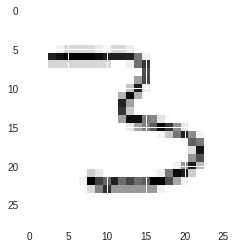

In [9]:
plt.imshow(x[0].reshape(28,28))
plt.show()

## Keras Model

In [0]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=784))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [0]:
def get_batch(dataset, batch_size = 256):
    while (1):
        yield dataset.next_batch(batch_size)

In [13]:
batch_size = 256
test_gen = get_batch(mnist.test, batch_size)
steps_per_epoch = mnist.test.num_examples// batch_size
print(model.metrics_names)
model.evaluate_generator(test_gen, steps_per_epoch)

['loss', 'acc']


[2.359920758467454, 0.10596955128205128]

In [16]:
batch_size = 256
data_gen = get_batch(mnist.train, batch_size)
steps_per_epoch = mnist.train.num_examples//batch_size

model.fit_generator(data_gen, steps_per_epoch, epochs=10)

Epoch 1/10
214/214 [==============================] - 1s 4ms/step - loss: 0.1862 - acc: 0.9462
Epoch 2/10
214/214 [==============================] - 1s 5ms/step - loss: 0.1338 - acc: 0.9609
Epoch 3/10
214/214 [==============================] - 1s 5ms/step - loss: 0.1050 - acc: 0.9702
Epoch 4/10
214/214 [==============================] - 1s 5ms/step - loss: 0.0876 - acc: 0.9733
Epoch 5/10
214/214 [==============================] - 1s 5ms/step - loss: 0.0738 - acc: 0.9784
Epoch 6/10
214/214 [==============================] - 1s 5ms/step - loss: 0.0622 - acc: 0.9815
Epoch 7/10
214/214 [==============================] - 1s 5ms/step - loss: 0.0543 - acc: 0.9844
Epoch 8/10
214/214 [==============================] - 1s 5ms/step - loss: 0.0459 - acc: 0.9869
Epoch 9/10
214/214 [==============================] - 1s 5ms/step - loss: 0.0410 - acc: 0.9884
Epoch 10/10
121/214 [===============>..............] - ETA: 0s - loss: 0.0355 - acc: 0.9898

214/214 [==============================] - 1s 5ms/step - loss: 0.0342 - acc: 0.9904


In [17]:
print(model.metrics_names)
model.evaluate_generator(test_gen, steps_per_epoch)

['loss', 'acc']


[0.08301616365211868, 0.9753760221962616]

It is really important to be able to reload the model after you've been training it for hours on end (usually). So save the model.

In [0]:
from keras.models import load_model

model.save('my_model.h5')

model2 = load_model('my_model.h5')

In [19]:
print(model.metrics_names)
model2.evaluate_generator(test_gen, steps_per_epoch)

['loss', 'acc']


[0.08268824817664991, 0.9757775992990654]

In [0]:
x, y = next(test_gen)

In [21]:
x.shape

(256, 784)

In [22]:
model.predict(x[:2])

array([[4.7574666e-10, 3.5543605e-06, 9.9998784e-01, 8.4484791e-06,
        3.2985757e-14, 1.6089934e-10, 3.5692227e-11, 8.7162833e-11,
        1.0998883e-07, 7.3597981e-14],
       [9.9977583e-01, 3.7636136e-07, 1.4634438e-04, 1.0560711e-06,
        4.2685001e-11, 9.9978470e-06, 1.8725041e-05, 2.9650057e-05,
        2.8941386e-06, 1.5052337e-05]], dtype=float32)

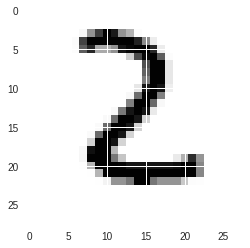

In [23]:
plt.imshow(x[0].reshape(28,28))

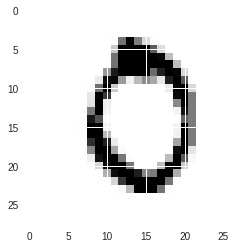

In [24]:
plt.imshow(x[1].reshape(28,28))

In [25]:
model.predict_classes(x[:2])

array([2, 0])

## Conclusion

There are only 3 things you need to remember.
1. Model Architecture.
2. model.fit(), don't worry too much about the generator part just yet. When you do lesson 5 we will ignore the generator functions. This is only useful if the data is too big to fit in memory.
3. model.predict() and model.predict_classes()

---